# Question:
### How the total salary of players in a team correlates with the winning percentage of regular seasons?

# Description of Investigation 
### *(see the iPython notebook context below)*
### 1. Calculate winning percentage of each team from 1985
### 2. Calculate total salary of each team in each year
### 3. Identify the division champions in each year 
### 4. Plot winning percentage and team salary to see if there is any correlation

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import scipy as sp

# Dataset used:
### Baseball data - Salaries.csv & Teams.csv

In [7]:
fpath = 'baseballdatabank-master/core'

fname_salary = 'Salaries.csv'
fname_teams = 'Teams.csv'

In [8]:
Salary = pd.read_csv(fpath+'/'+fname_salary)
Teams = pd.read_csv(fpath+'/'+fname_teams)

### Data stored in "Teams" starts in 1870s.

In [52]:
Teams.tail(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2795,2015,NL,NYN,NYM,E,1,162,81.0,90,72,...,131.0,0.986,New York Mets,Citi Field,2569753.0,94,92,NYM,NYN,NYN
2796,2015,NL,WAS,WSN,E,2,162,81.0,83,79,...,125.0,0.985,Washington Nationals,Nationals Park,2619843.0,102,99,WSN,MON,WAS
2797,2015,NL,MIA,FLA,E,3,162,81.0,71,91,...,162.0,0.987,Miami Marlins,Marlins Park,1752235.0,98,97,MIA,FLO,MIA
2798,2015,NL,ATL,ATL,E,4,162,81.0,67,95,...,186.0,0.985,Atlanta Braves,Turner Field,2001392.0,97,97,ATL,ATL,ATL
2799,2015,NL,PHI,PHI,E,5,162,81.0,63,99,...,145.0,0.981,Philadelphia Phillies,Citizens Bank Park,1831080.0,98,98,PHI,PHI,PHI
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,171.0,0.985,Colorado Rockies,Coors Field,2506789.0,119,118,COL,COL,COL


In [53]:
Teams.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

### The salary data, however, is availabe after 1985

In [10]:
Salary.head(3)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000


### Focus on Team data after 1985

In [11]:
Teams_a = Teams[Teams['yearID']>=1985]
Salary_a = Salary[Salary['yearID']>=1985]

In [12]:
Teams_a.columns

Index([u'yearID', u'lgID', u'teamID', u'franchID', u'divID', u'Rank', u'G',
       u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin', u'WSWin', u'R',
       u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB', u'CS', u'HBP',
       u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV', u'IPouts', u'HA',
       u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name', u'park',
       u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

### Identify the top rank team in each season in each division

In [13]:
Teams_a['Top1'] = 0

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
Teams_a['Top1'][Teams_a['Rank']==1] = 1

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:4428: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_globa

## Adding winning percentage column to the dataframe

In [15]:
## TopTeams = Teams30yr[Teams30yr['Rank']<5].groupby(['lgID','divID'])
Teams_a['WinPct'] = Teams_a['W']/(Teams_a['W']+Teams_a['L'])

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### * Visualize the grouped data and sort them by 'Rank' 

In [16]:
# Truncate the screen output up to the year 1986

for (yearID,lgID,divID), group in Teams_a[Teams_a['yearID'] < 1987].groupby(['yearID','lgID','divID']):
    print "Year: %s, League: %s, Div: %s" %(yearID,lgID,divID)
    print group[['yearID','lgID','teamID','name','Rank','W','L','WinPct','Top1']].sort('Rank')
    print '\n'
    #if group['yearID'] > 1998:
    #    break
    

Year: 1985, League: AL, Div: E
      yearID lgID teamID               name  Rank   W    L    WinPct  Top1
1942    1985   AL    TOR  Toronto Blue Jays     1  99   62  0.614907     1
1932    1985   AL    NYA   New York Yankees     2  97   64  0.602484     0
1925    1985   AL    DET     Detroit Tigers     3  84   77  0.521739     0
1918    1985   AL    BAL  Baltimore Orioles     4  83   78  0.515528     0
1919    1985   AL    BOS     Boston Red Sox     5  81   81  0.500000     0
1930    1985   AL    ML4  Milwaukee Brewers     6  71   90  0.440994     0
1924    1985   AL    CLE  Cleveland Indians     7  60  102  0.370370     0


Year: 1985, League: AL, Div: W
      yearID lgID teamID                name  Rank   W   L    WinPct  Top1
1927    1985   AL    KCA  Kansas City Royals     1  91  71  0.561728     1
1920    1985   AL    CAL   California Angels     2  90  72  0.555556     0
1921    1985   AL    CHA   Chicago White Sox     3  85  77  0.524691     0
1929    1985   AL    MIN     Minneso

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


## Now, investigate the salary information

### The salary data was given for every single player

In [17]:
Salary_a.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


## Need to group the salary data by year and team
## Compute the total yearly team salary and compare it with team's winning pct in that year

In [18]:
salary_grouped = Salary_a.groupby(['yearID','teamID']).sum() 
salary_grouped_a = Salary[Salary.yearID >= 1985].groupby(['yearID','teamID'], as_index = False).sum() 

# this will return a 'groupby' object

### salary data is now grouped "per team per year" basis

In [19]:
salary_grouped_a.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [20]:
Teams_a.head()  # winning percentage at last column

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Top1,WinPct
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,0,0.407407
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,0,0.515528
1919,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,0,0.500000
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,0,0.555556
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,0,0.524691


# Merge two data frames

### 1. Teams
### 2. Salaries

In [21]:
# if we do this, 'outer' keeps all players name after merge
# need to calculate sum before merging

#pd.merge(Teams25yr[['yearID','teamID','WinPct','name']], \
#         salary_grouped25,left_on=['teamID','yearID'],right_index = True, how = 'left')
Team_Salary = pd.merge(Teams_a[['yearID','teamID','WinPct','name','Rank','Top1']], \
         salary_grouped_a,on=['teamID','yearID'],right_index = False, how = 'left')

#### * Check if the merging is done correctly

In [51]:
Team_Salary[Team_Salary.yearID == 2015]  # sample: show year 2014 data

,yearID,teamID,WinPct,name,Rank,Top1,salary
858,2015,KCA,0.586420,Kansas City Royals,1,1,112107025
859,2015,MIN,0.512346,Minnesota Twins,2,0,107755000
860,2015,CLE,0.503106,Cleveland Indians,3,0,87663766
861,2015,CHA,0.469136,Chicago White Sox,4,0,112373700
862,2015,DET,0.459627,Detroit Tigers,5,0,172284750
863,2015,TOR,0.574074,Toronto Blue Jays,1,1,112992400
864,2015,NYA,0.537037,New York Yankees,2,0,212751957
865,2015,BAL,0.500000,Baltimore Orioles,3,0,115044833
866,2015,TBA,0.493827,Tampa Bay Rays,4,0,64521233
867,2015,BOS,0.481481,Boston Red Sox,5,0,181103400


# Plotting 

In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

#### * Scatter plot of the entire datasets (salary v.s. winning pct.)
#### There is weak, but positive correlation between salary and winning percentage

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


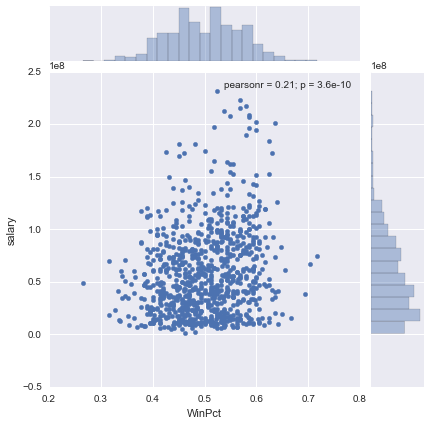

In [25]:
sns.jointplot(Team_Salary.WinPct, Team_Salary.salary)

#### * same dataset, but different type of scatter plot using seaborn

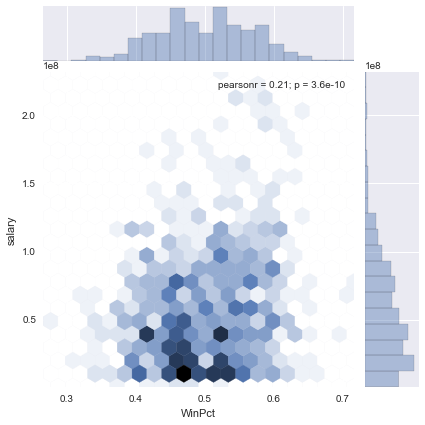

In [26]:
sns.jointplot(Team_Salary.WinPct, Team_Salary.salary,kind='hex')

#### * same dataset, but different type of scatter plot using seaborn

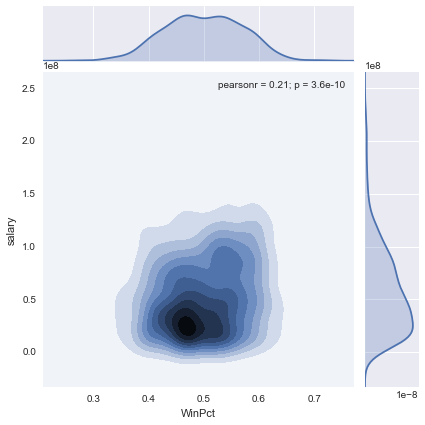

In [27]:
sns.jointplot(Team_Salary.WinPct, Team_Salary.salary,kind='kde')

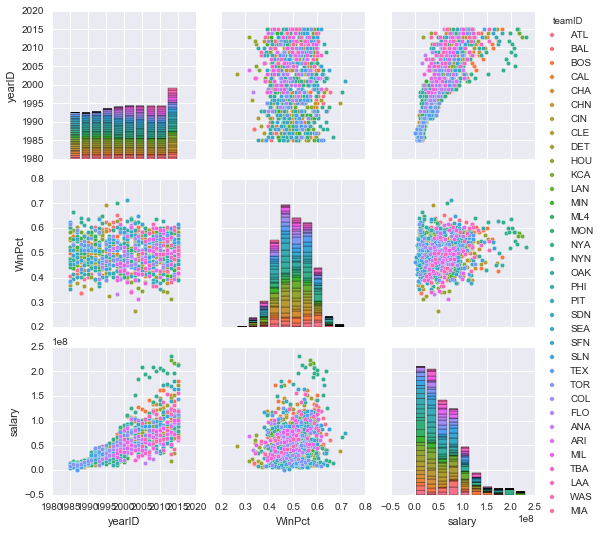

In [28]:
sns.pairplot(Team_Salary[['teamID','yearID','WinPct','salary']], hue="teamID")

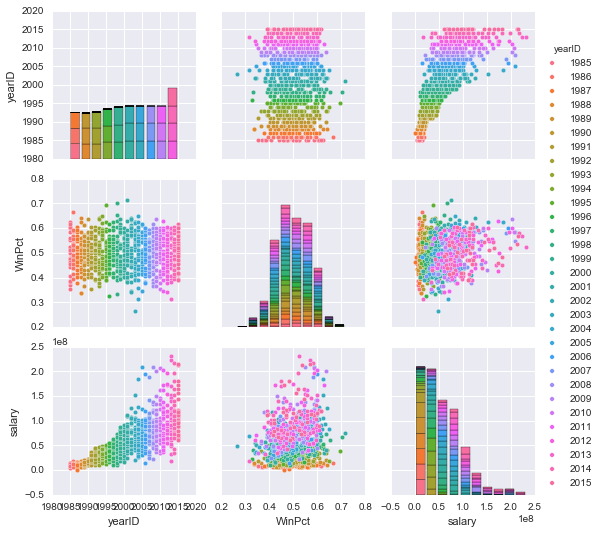

In [29]:
sns.pairplot(Team_Salary[['teamID','yearID','WinPct','salary']], hue="yearID")

## < Preliminary findings >
### 1. distribution of yearly salaries increases in recent years
### 2. There is a weak but positive correlation in salary and winning percentage

## * Investigate standard deviation of yearly salary (1985 ~ 2014)

In [30]:
yearly_std = Team_Salary.groupby('yearID').std()

In [31]:
yearly_std

,WinPct,Rank,Top1,salary
yearID,,,,
1985,0.077786,1.913515,0.367946,2.470845e+06
1986,0.063243,1.929926,0.367946,3.186956e+06
1987,0.060587,1.849740,0.367946,3.848337e+06
1988,0.074235,1.929926,0.367946,3.386331e+06
1989,0.061035,1.924738,0.367946,3.568844e+06
1990,0.055858,1.892495,0.367946,3.771834e+06
1991,0.059708,1.950542,0.367946,6.894669e+06
1992,0.063072,1.871240,0.367946,9.150607e+06
1993,0.075021,2.017122,0.356348,9.232485e+06


### Total salary data indicates there is more spread in total team salary among teams in recent years than in 1980s.

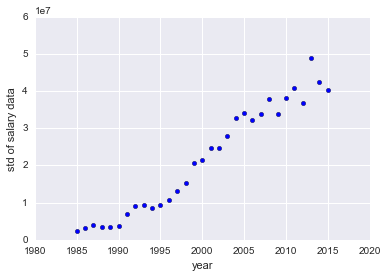

In [34]:
plt.scatter(np.arange(1985,2016),yearly_std.salary)
plt.xlabel('year')
plt.ylabel('std of salary data');

### In the figure below, green dots inidcate the division winning teams. 
### Most of the years, the highest paying team ended up a division champion, but not always, for example 2007, 2008, 2010 and etc.

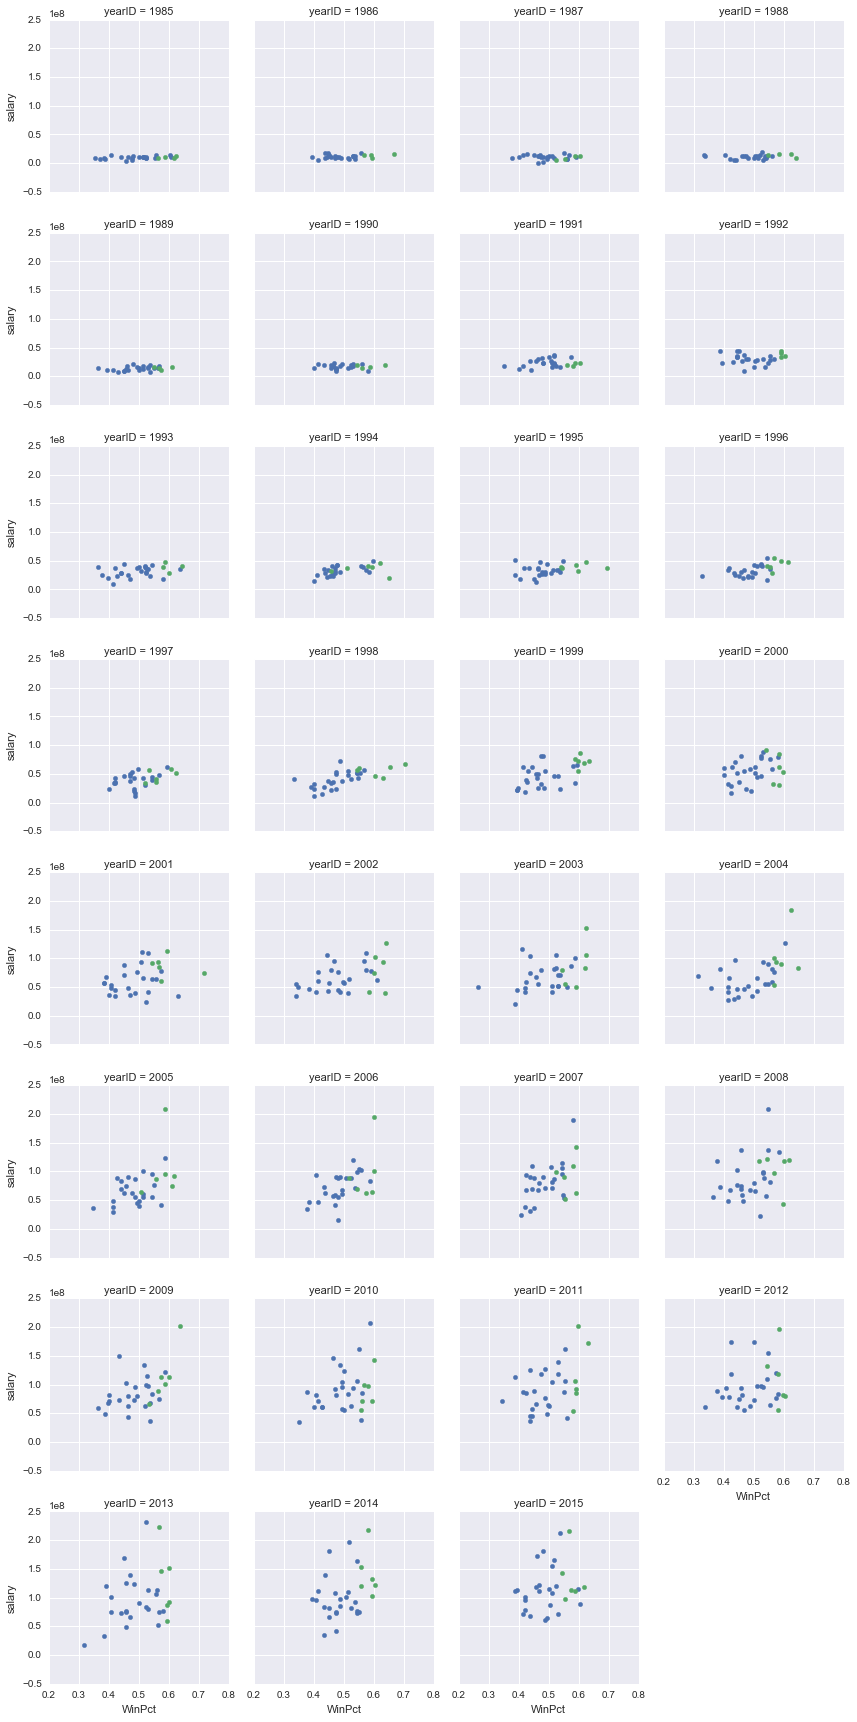

In [35]:
g=sns.FacetGrid(Team_Salary, col = "yearID", hue="Top1",col_wrap=4)
g.map(sns.plt.scatter,"WinPct","salary")

### Calculating mean salary in these separate groups (division champions and other teams) would confirm the correlation between salary and winning percentage from another point of view.

In [36]:
Team_Salary_compare = Team_Salary.groupby(['yearID','Top1']).mean()

In [37]:
Team_Salary_compare.head()

WinPct      Rank        salary
yearID Top1                                  
1985   0     0.482428  4.181818  1.004754e+07
       1     0.596628  1.000000  1.022968e+07
1986   0     0.481007  4.227273  1.153446e+07
       1     0.604306  1.000000  1.352412e+07
1987   0     0.487626  4.181818  1.068214e+07

#### convert hierarchical multi-index to columns

In [38]:
Team_Salary_compare.reset_index(inplace=True)

In [39]:
Team_Salary_compare.tail()

,yearID,Top1,WinPct,Rank,salary
57,2013,1,0.587449,1.0,1.268576e+08
58,2014,0,0.479938,3.5,9.768194e+07
59,2014,1,0.580247,1.0,1.413252e+08
60,2015,0,0.481472,3.5,1.130625e+08
61,2015,1,0.574074,1.0,1.334404e+08


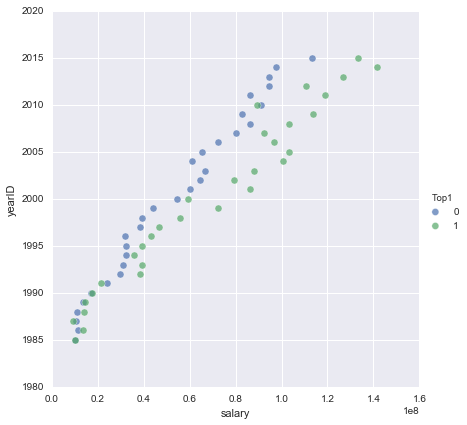

In [40]:
g = sns.FacetGrid(Team_Salary_compare, hue="Top1", size = 6)
g.map(plt.scatter, "salary", "yearID", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

# Conclusion: 
## In the plot above, 1 indicates division champions and 0, the rest of the teams.
## The horizontal axis (salary) is the sum of each group (0 and 1) per each year.
## Salary and winning percentage shows a reasonable positive correlation except years in 1980s and the year 2010.



### -------------------------------------------------------------------------------------------------- end of 1st submission 1/15/16

# Revision 1

## A. Exploration Phase

### **1. Univariate plots**

 ### 1-1 Histogram of overall winning percentage (1985 ~ 2014)
 * slightly bimodal

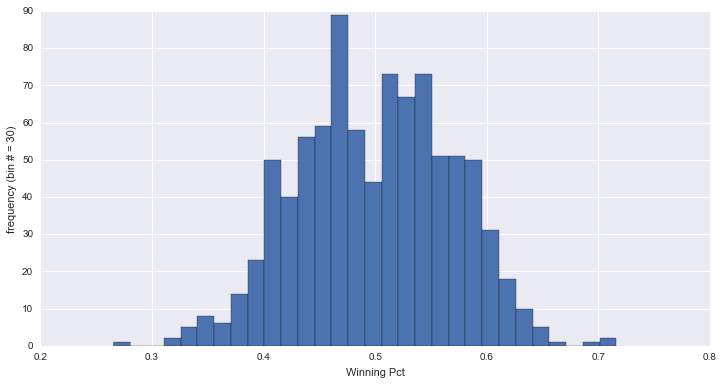

In [41]:
plt.figure(figsize=(12, 6))
plt.hist(Team_Salary.WinPct, bins = 30)
#Team_Salary[Team_Salary.yearID == 1985].salary
plt.xlabel('Winning Pct')
plt.ylabel('frequency (bin # = 30)')

  ### 1-2 box plot of total team salary (1985~2014)
    * After 2003, there are teams paying high salaries out of norm (outliers)
    * But as shown in the previous figure, highest salaried team didn't always win the division title

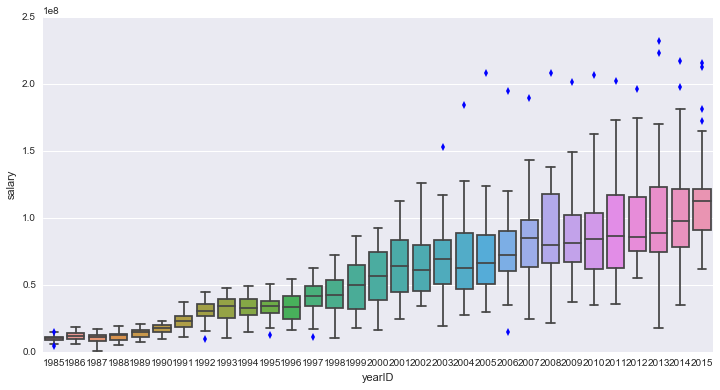

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="yearID",y="salary",data=Team_Salary)

### **2. Correlation**

### 2-1 Calculate Pearson Correlation coefficient between WinPct and salary each year

In [43]:
Team_Salary.head(10)

,yearID,teamID,WinPct,name,Rank,Top1,salary
0,1985,ATL,0.407407,Atlanta Braves,5,0,14807000
1,1985,BAL,0.515528,Baltimore Orioles,4,0,11560712
2,1985,BOS,0.500000,Boston Red Sox,5,0,10897560
3,1985,CAL,0.555556,California Angels,2,0,14427894
4,1985,CHA,0.524691,Chicago White Sox,3,0,9846178
5,1985,CHN,0.478261,Chicago Cubs,4,0,12702917
6,1985,CIN,0.552795,Cincinnati Reds,2,0,8359917
7,1985,CLE,0.370370,Cleveland Indians,7,0,6551666
8,1985,DET,0.521739,Detroit Tigers,3,0,10348143
9,1985,HOU,0.512346,Houston Astros,3,0,9993051


#### * define a function to calculate correlation coefficient

In [44]:
def calc_corr(df):
    corr_val =  sp.stats.pearsonr(df.WinPct, df.salary)
    return corr_val[0]

#### * group by each year

In [45]:
Corr = Team_Salary.groupby('yearID')

#### * apply the function calculating Pearson r.

In [46]:
corr2 = Corr.apply(calc_corr)

In [47]:
corr2.to_frame()

,0
yearID,
1985,0.343779
1986,0.218362
1987,-0.051683
1988,0.162991
1989,0.347975
1990,0.001006
1991,0.233345
1992,0.032682
1993,0.352641


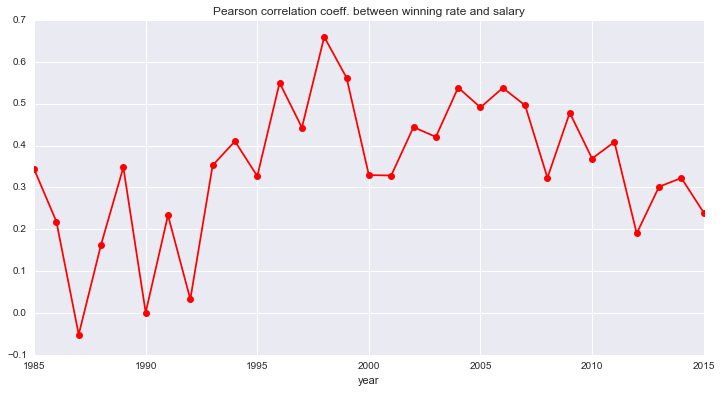

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(corr2.to_frame(), 'ro-' )
plt.xlabel("year")
plt.title("Pearson correlation coeff. between winning rate and salary")

## B. Conclusion Phase

#### As shown in the table (dataframe) and the plot above, the correlation between winning percentage and salary stays positive in most of the years, but it is also showing a declining trend in correlation. Considering the teams are spending more dollars on salary, this downward trending does not support that the higher salary would not directly generates a better performance in the league.

### Limitation to the analysis

1. As pointed out by the reviewer, annual inflation rate may need to be considered when salary data are used. This analysis, however, looks more into how the distribution of total team salary in each year reflects on the winning percentage of each team.
2. It is clearly shown that even though the mean salary increases gradually over the year, the salary distribution among teams in any given year are becoming larger in recent years. (the standard deviation plot & the box plot)
3. The teams performance (winning percentage) is the reflection of many things; primarily teams Run-scored and pitchers ERA. It will be interesting to see the correlation between performance stats (Runs, RBIs, batting averages and ERAs) with winning percentage and/or final team ranking in each season.

### The reviewer suggests to perform 'One-way ANOVA' to exceed the specification.
### Here's the procedure

1. Divide the data into three groups by years
  * group1: year 1985~1994
  * group2: year 1995~2004
  * group3: year 2005~2014
  
2. In each group, calculate a varaible, Salary_ratio: Sr = (mean salary of division champions)/(mean salary of the rest of teams) 

3. Null hypothesis is 
    H0: Sr1 = Sr2 = Sr3  

4. If I'd be able to reject the null hypothesis, then this test proves that there would be difference in salary total between champions and the rest of the teams

### ----------------------------------------------------------------------------------------- end of 2nd submission (revision 1) 1/20/16

# Revision 2

## revisit the figure

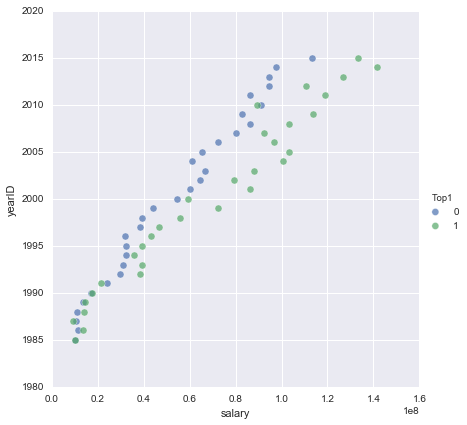

In [49]:
g = sns.FacetGrid(Team_Salary_compare, hue="Top1", size = 6)
g.map(plt.scatter, "salary", "yearID", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

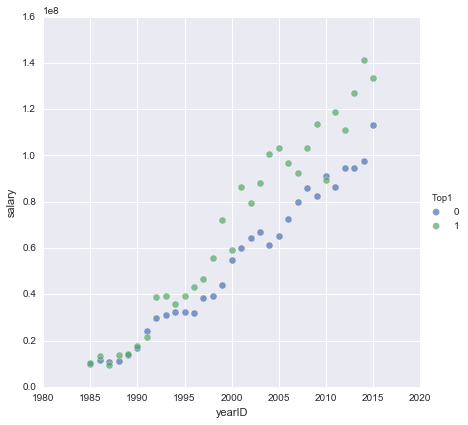

In [50]:
g = sns.FacetGrid(Team_Salary_compare, hue="Top1", size = 6)
g.map(plt.scatter, "yearID", "salary", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

## Now that the variables are switched. 
1. The variables shown are the mean salaries between 1) division champs and 2) rest of the team in each year.
2. The point I tried to make using this figure was to visualize that there would be clear differences in salary between champnions and not champions leading to conclusion that even though the over correlation between salary and winning pct are decreasing in recent years, the leaders have still been spending lot more money than the rest and the gap between these two groups are diverging even further.
3. Should/could I quantify this? then how? t-test because now we only have two groups?